In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
nombres = np.genfromtxt("../data/pmv.csv",delimiter=',',max_rows=1,dtype="U")
for i in enumerate(nombres):
    print(i)
    
nombres[0] = 'tiempo'
nombres[1] = "To"
nombres[2] = 'Tr'
nombres[3] = "Ti"
nombres[4] = 'Tbh'
nombres[5] = "m3"
nombres[6] = 'ach'
nombres[7] = "hr"
nombres[8] = 'pmv'
nombres[9] = "ppd"

(0, 'Date/Time')
(1, 'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)')
(2, 'D7:Zone Mean Radiant Temperature [C](TimeStep)')
(3, 'D7:Zone Mean Air Temperature [C](TimeStep)')
(4, 'D7:Zone Mean Air Dewpoint Temperature [C](TimeStep)')
(5, 'D7:AFN Zone Infiltration Volume [m3](TimeStep)')
(6, 'D7:AFN Zone Infiltration Air Change Rate [ach](TimeStep)')
(7, 'D7:Zone Air Relative Humidity [%](TimeStep)')
(8, 'D7 PEOPLE:Zone Thermal Comfort Fanger Model PMV [](TimeStep)')
(9, 'D7 PEOPLE:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)')


In [3]:
pmv = pd.read_csv("../data/pmv.csv",delimiter=",",names=nombres,skiprows=1)
pmv = pmv[pmv.pmv>=0 ]
pmv.loc[(pmv.pmv>=0)|(pmv.pmv<=0.5),"target"] = 0
pmv.loc[(pmv.pmv>0.5),"target"] = 1
del pmv['m3']
del pmv['tiempo']
del pmv['pmv']
del pmv['ppd']
pmv.columns

Index(['To', 'Tr', 'Ti', 'Tbh', 'ach', 'hr', 'target'], dtype='object')

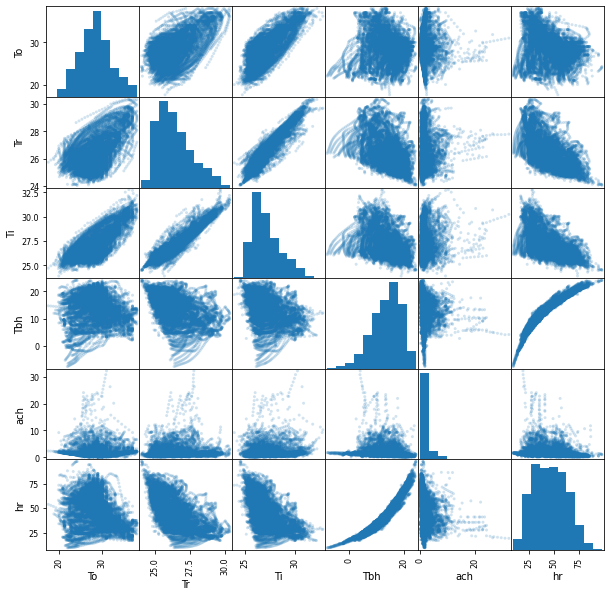

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(pmv[["To","Tr","Ti", "Tbh", "ach", "hr"]], alpha=0.2, figsize=(10,10), diagonal='hist');

In [9]:
from matplotlib.lines import Line2D
def plotData(X1_name, X2_name):
    fig, ax = plt.subplots(figsize=(6, 6))
    colors={0: "red", 1: "blue"}
    legend={"No Comfort": "red", "Comfort": "blue"}
    ax.scatter(pmv[X1_name], pmv[X2_name], c=pmv["target"].map(colors))
    ax.set_xlabel(X1_name)
    ax.set_ylabel(X2_name)
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in legend.items()]
    ax.legend(title='Thermal status', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

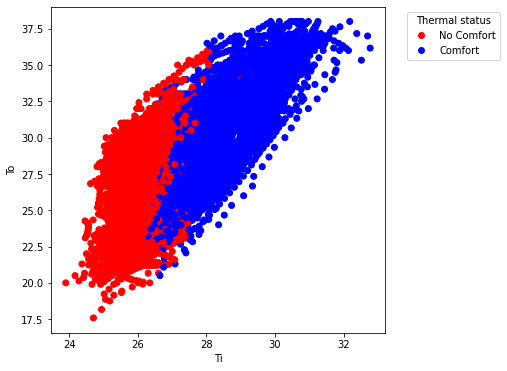

In [10]:
plotData("Ti", "To")

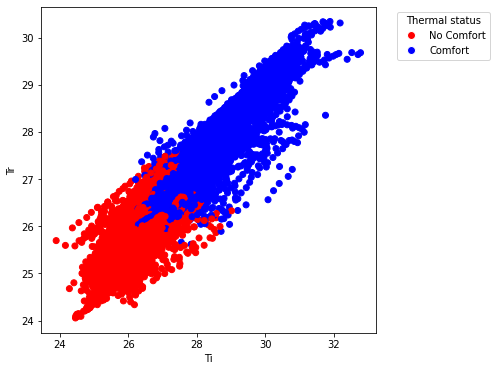

In [11]:
plotData("Ti", "Tr")

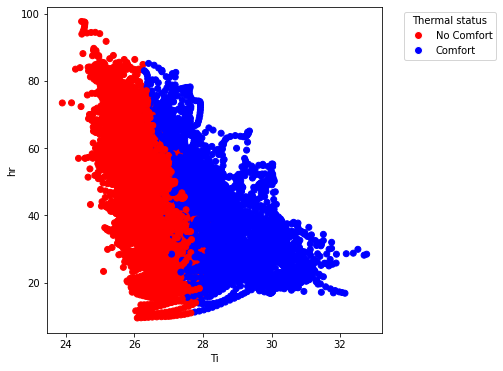

In [14]:
plotData("Ti", "hr")

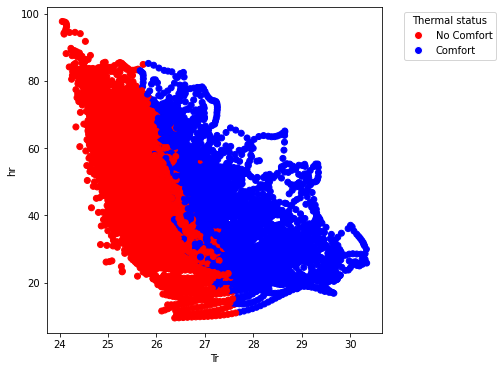

In [94]:
plotData("Tr", "hr")

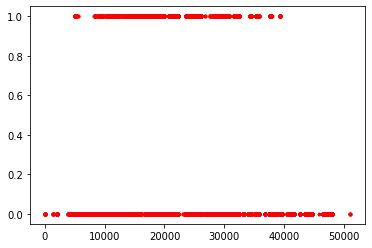

In [4]:
# pmv.target.plot()
fig, ax = plt.subplots()

ax.plot(pmv.target,"r.")

In [95]:
data   = np.array(pmv[['Tr', 'hr']])
target = np.array(pmv.target,dtype=int)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33)
N, D = X_train.shape

In [98]:
from sklearn.preprocessing import StandardScaler
tf.keras.optimizers

<module 'tensorflow.keras.optimizers' from '/home/eapc/.local/lib/python3.8/site-packages/tensorflow/keras/optimizers/__init__.py'>

In [99]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 

In [100]:
def show_score(clf, X_train, y_train, X_test, y_test):
  clfscore = clf.score(X_train, y_train)
  print("La calificación de entrenamiento obtenida con este modelo es: {:.3f}".format(clfscore))
  clfscore = clf.score(X_test, y_test)
  print("La calificación de prueba obtenida con este modelo es: {:.3f}".format(clfscore))

In [110]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=5.0, gamma=0.1).fit(X_train, y_train)
show_score(clf, X_train, y_train, X_test, y_test)

La calificación de entrenamiento obtenida con este modelo es: 0.959
La calificación de prueba obtenida con este modelo es: 0.957


In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["Accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test))

Epoch 1/100
217/217 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.0000e+00 - val_loss: 0.4704 - val_accuracy: 0.0000e+00
Epoch 2/100
217/217 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.0000e+00 - val_loss: 0.4167 - val_accuracy: 0.0000e+00
Epoch 3/100
217/217 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.0000e+00 - val_loss: 0.3834 - val_accuracy: 0.0000e+00
Epoch 4/100
217/217 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.0000e+00 - val_loss: 0.3603 - val_accuracy: 0.0000e+00
Epoch 5/100
217/217 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.0000e+00 - val_loss: 0.3421 - val_accuracy: 0.0000e+00
Epoch 6/100
217/217 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.0000e+00 - val_loss: 0.3265 - val_accuracy: 0.0000e+00
Epoch 7/100
217/217 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 

217/217 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.0094 - val_loss: 0.1370 - val_accuracy: 0.0108
Epoch 55/100
217/217 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.0107 - val_loss: 0.1366 - val_accuracy: 0.0120
Epoch 56/100
217/217 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.0124 - val_loss: 0.1362 - val_accuracy: 0.0132
Epoch 57/100
217/217 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.0133 - val_loss: 0.1358 - val_accuracy: 0.0146
Epoch 58/100
217/217 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.0144 - val_loss: 0.1354 - val_accuracy: 0.0158
Epoch 59/100
217/217 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.0157 - val_loss: 0.1350 - val_accuracy: 0.0164
Epoch 60/100
217/217 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.0169 - val_loss: 0.1347 - val_accuracy: 0.0170
Epoch

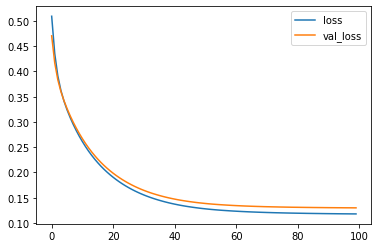

In [112]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

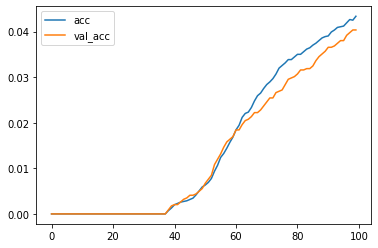

In [113]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

In [114]:
x=np.array([[24.45912869, 97.63675648]])
x = scaler.transform(data)
x

array([[-1.9440902 ,  3.15850092],
       [-1.91771866,  3.15014256],
       [-1.89655107,  3.14523772],
       ...,
       [-0.95050919, -1.30888136],
       [-0.93521694, -1.39185798],
       [-0.93714988, -1.40654167]])

In [115]:
predicho = model.predict(x)

In [116]:
x

array([[-1.9440902 ,  3.15850092],
       [-1.91771866,  3.15014256],
       [-1.89655107,  3.14523772],
       ...,
       [-0.95050919, -1.30888136],
       [-0.93521694, -1.39185798],
       [-0.93714988, -1.40654167]])

In [117]:
predicho = np.round(predicho)

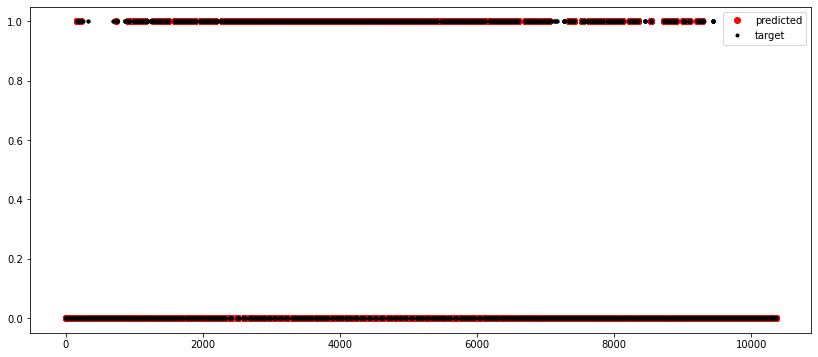

In [121]:
fig, ax  = plt.subplots(figsize=(14,6))

ax.plot(predicho,'ro',label="predicted")
ax.plot(target  ,'k.',label="target")
ax.legend()

In [119]:
target.shape

(10359,)

In [120]:
predicho.shape

(10359, 1)